# **Block 1: Importing Libraries and Settings**

In [7]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn - model & preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Warning management
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style="whitegrid")


# **Block 2: Load and Inspect Dataset**

In [8]:
# Load Excel dataset (ensure the path is correct for your environment)
df = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')

# Preview shape and structure
print("Dataset shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)
print("\nMissing Values:\n")
print(df.isnull().sum())
print("\nPreview of Data:\n")
df.head()


Dataset shape: (908, 13)

Column Names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']

Data Types:

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

Missing Values:

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Preview of Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# **Block 3: Handling Missing Values**

In [9]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values before handling:\n", missing)

# Impute numerical columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Final check
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values before handling:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Missing values after handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


# **Block 4: Exploratory Data Analysis (EDA)**

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,908.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,386,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.055826,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.800000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


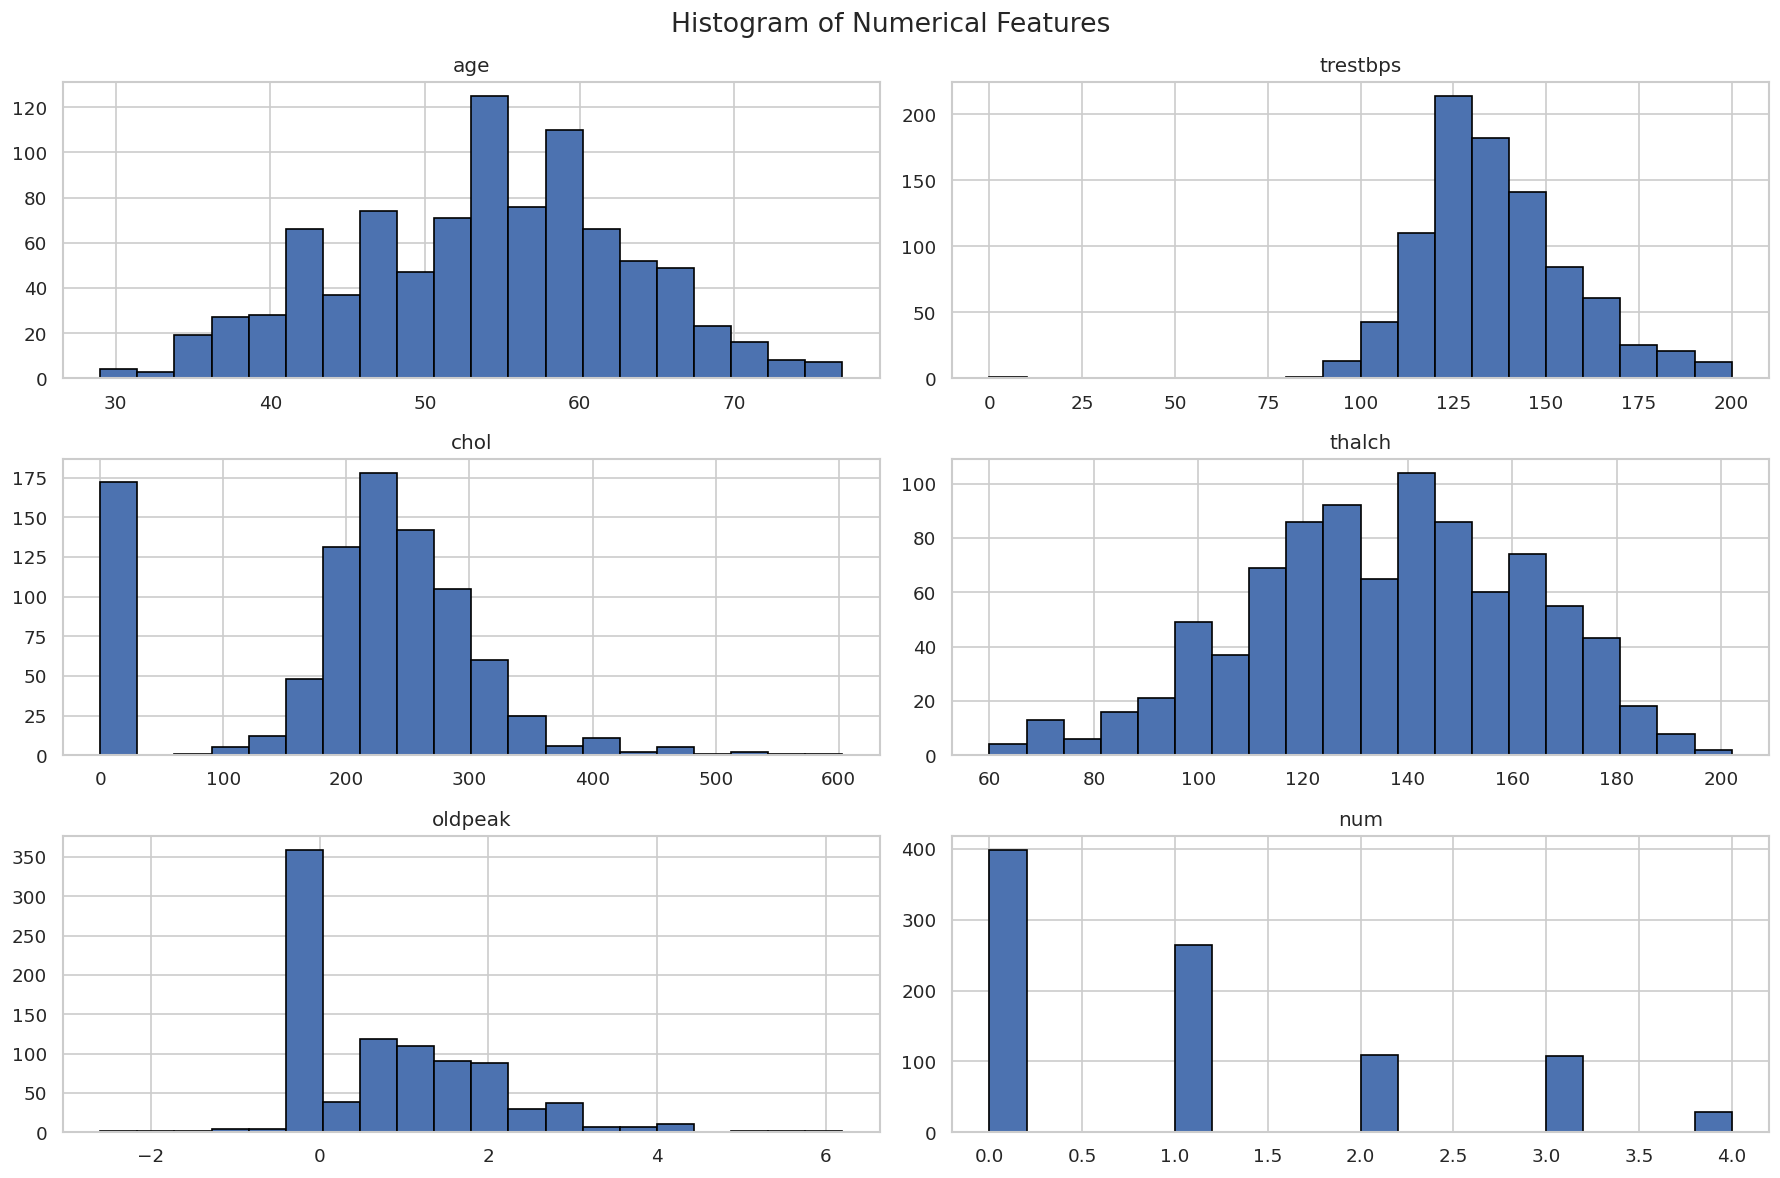

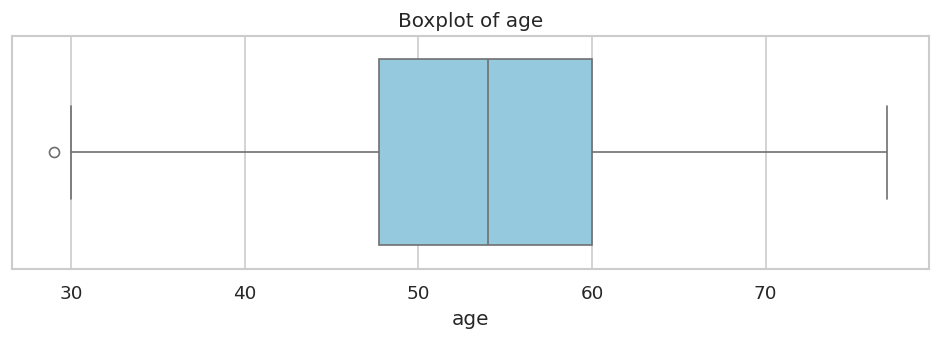

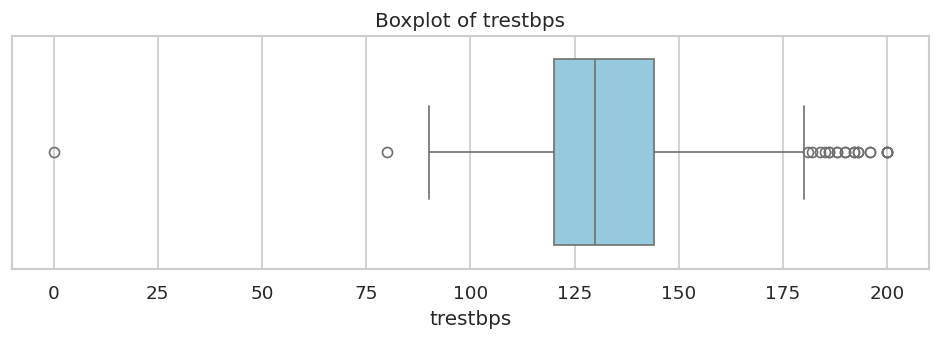

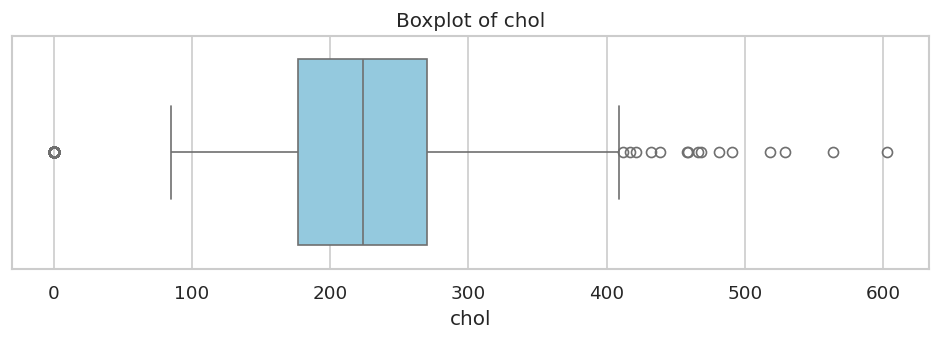

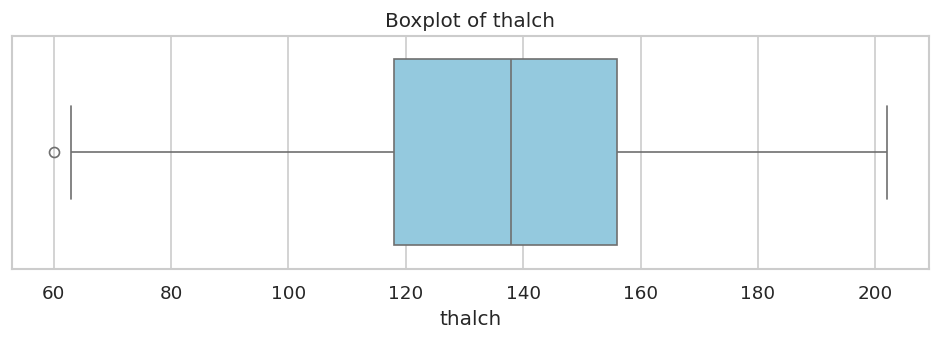

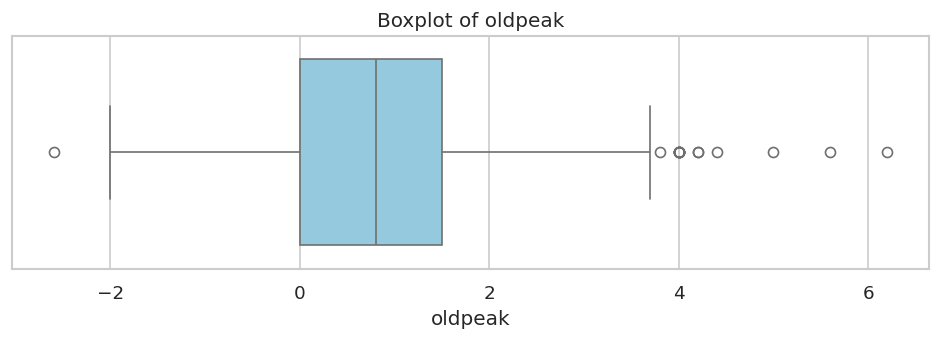

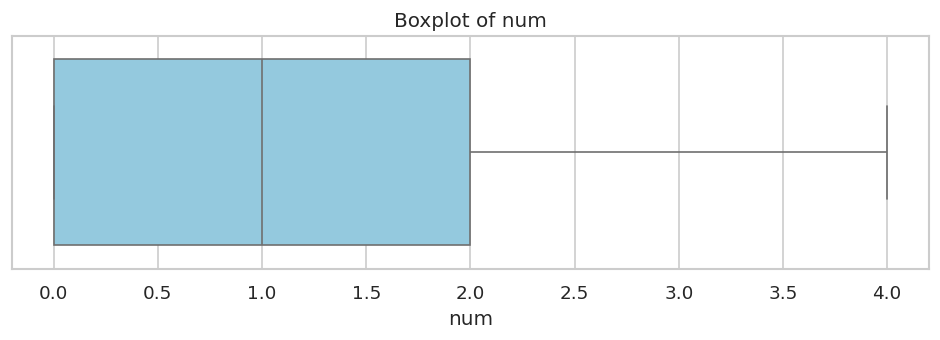

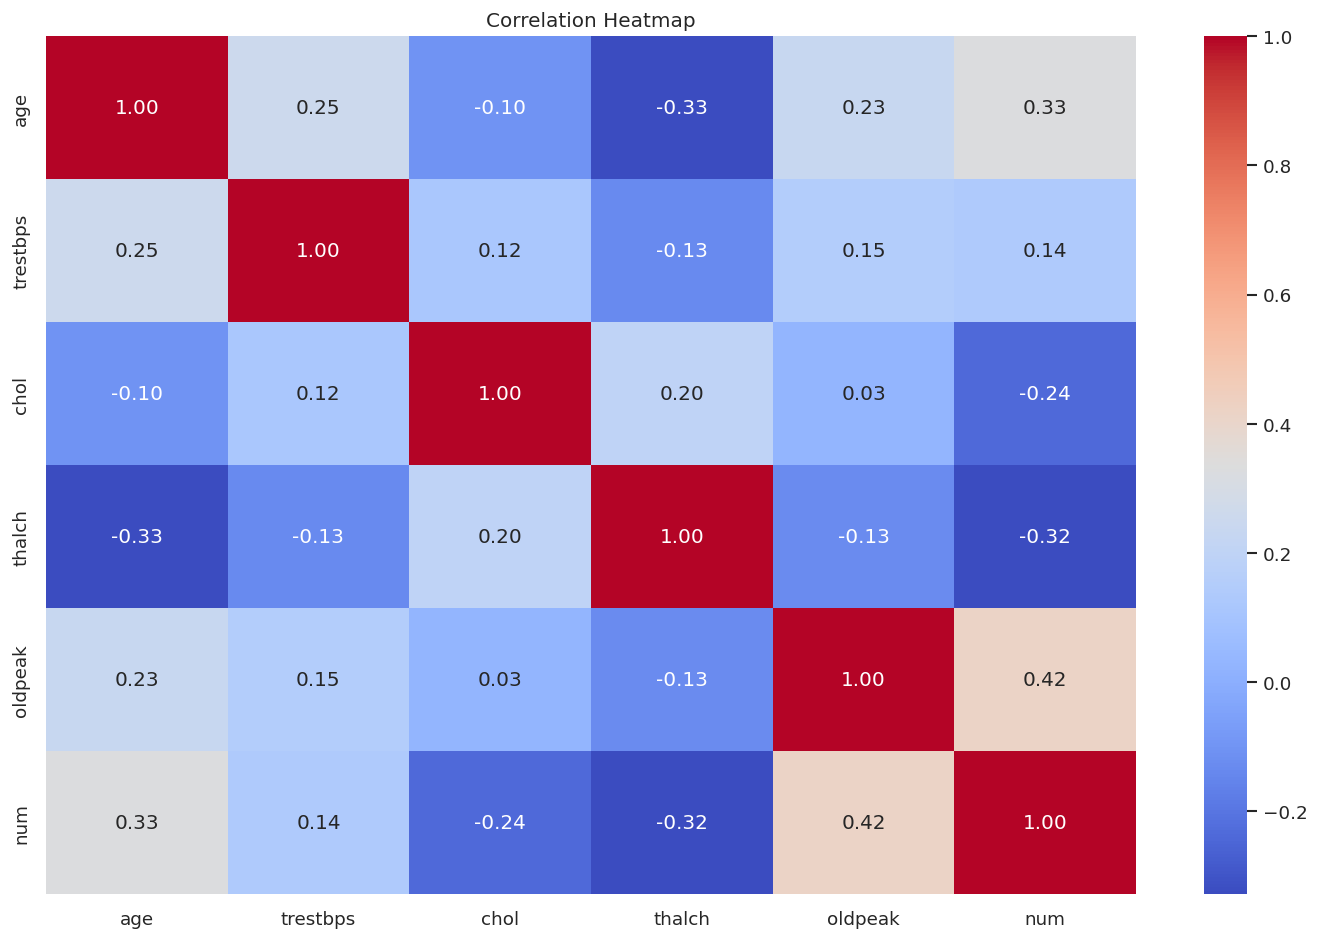

In [10]:
# Summary statistics
display(df.describe(include='all'))

# Select numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Histogram
if not num_df.empty:
    num_df.hist(figsize=(15, 10), bins=20, edgecolor='black')
    plt.suptitle("Histogram of Numerical Features", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")

# Boxplots
for col in num_df.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Correlation heatmap
if not num_df.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


# **Block 5: Feature Engineering**

In [11]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Handle any missing values after encoding
df.fillna(df.mean(numeric_only=True), inplace=True)

# Scale numerical features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final check
print("Missing values after preprocessing:\n")
print(df.isnull().sum())


Missing values after preprocessing:

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


# **Block 6: Splitting the Dataset**

In [12]:
#Convert the target variable 'num' into binary classification (0 = no disease, 1 = disease)
df['num'] = (df['num'] > 0).astype(int)

# Define features and target
X = df.drop('num', axis=1)
y = df['num']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes to confirm
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (726, 19)
Testing Set Shape: (182, 19)


# **Block 7: Building and Training the Decision Tree Classifier**

In [13]:
# Initialize the Decision Tree model with chosen hyperparameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


# **Block 8: Model Evaluation**

In [14]:
# Evaluate performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Model Evaluation Metrics:
Accuracy: 0.7637362637362637
Precision: 0.7652797202797202
Recall: 0.7637362637362637
F1 Score: 0.7644837342950551
ROC-AUC Score: 0.7030075187969925


In [22]:
from sklearn.metrics import classification_report

# Generate classification report as dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report table
print("Classification Report (Base Model):")
display(report_df.round(2))


Classification Report (Base Model):


,precision,recall,f1-score,support
0,0.77,0.84,0.81,133.0
1,0.43,0.33,0.37,49.0
accuracy,0.70,0.70,0.70,0.7
macro avg,0.60,0.58,0.59,182.0
weighted avg,0.68,0.70,0.69,182.0


# **Block 9: Hyperparameter Tuning**

In [16]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Extract best model and best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Predict using best model
y_pred = best_model.predict(X_test)

# Evaluate best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

# Display results
print("\nEvaluation with Best Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

Evaluation with Best Model:
Accuracy: 0.7032967032967034
Precision: 0.6808803498458671
Recall: 0.7032967032967034
F1 Score: 0.6890001415683196
ROC-AUC Score: 0.5843179377013963


In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Show results
print("Cross-Validation Accuracy Scores (Best Model):", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores (Best Model): [0.75342466 0.77931034 0.82758621 0.8        0.74482759]
Mean CV Accuracy: 0.7810
Standard Deviation of CV Scores: 0.0303


# **Block 10: Decision Tree Visualization and Feature Importance**

Confusion Matrix:
 [[112  21]
 [ 33  16]]


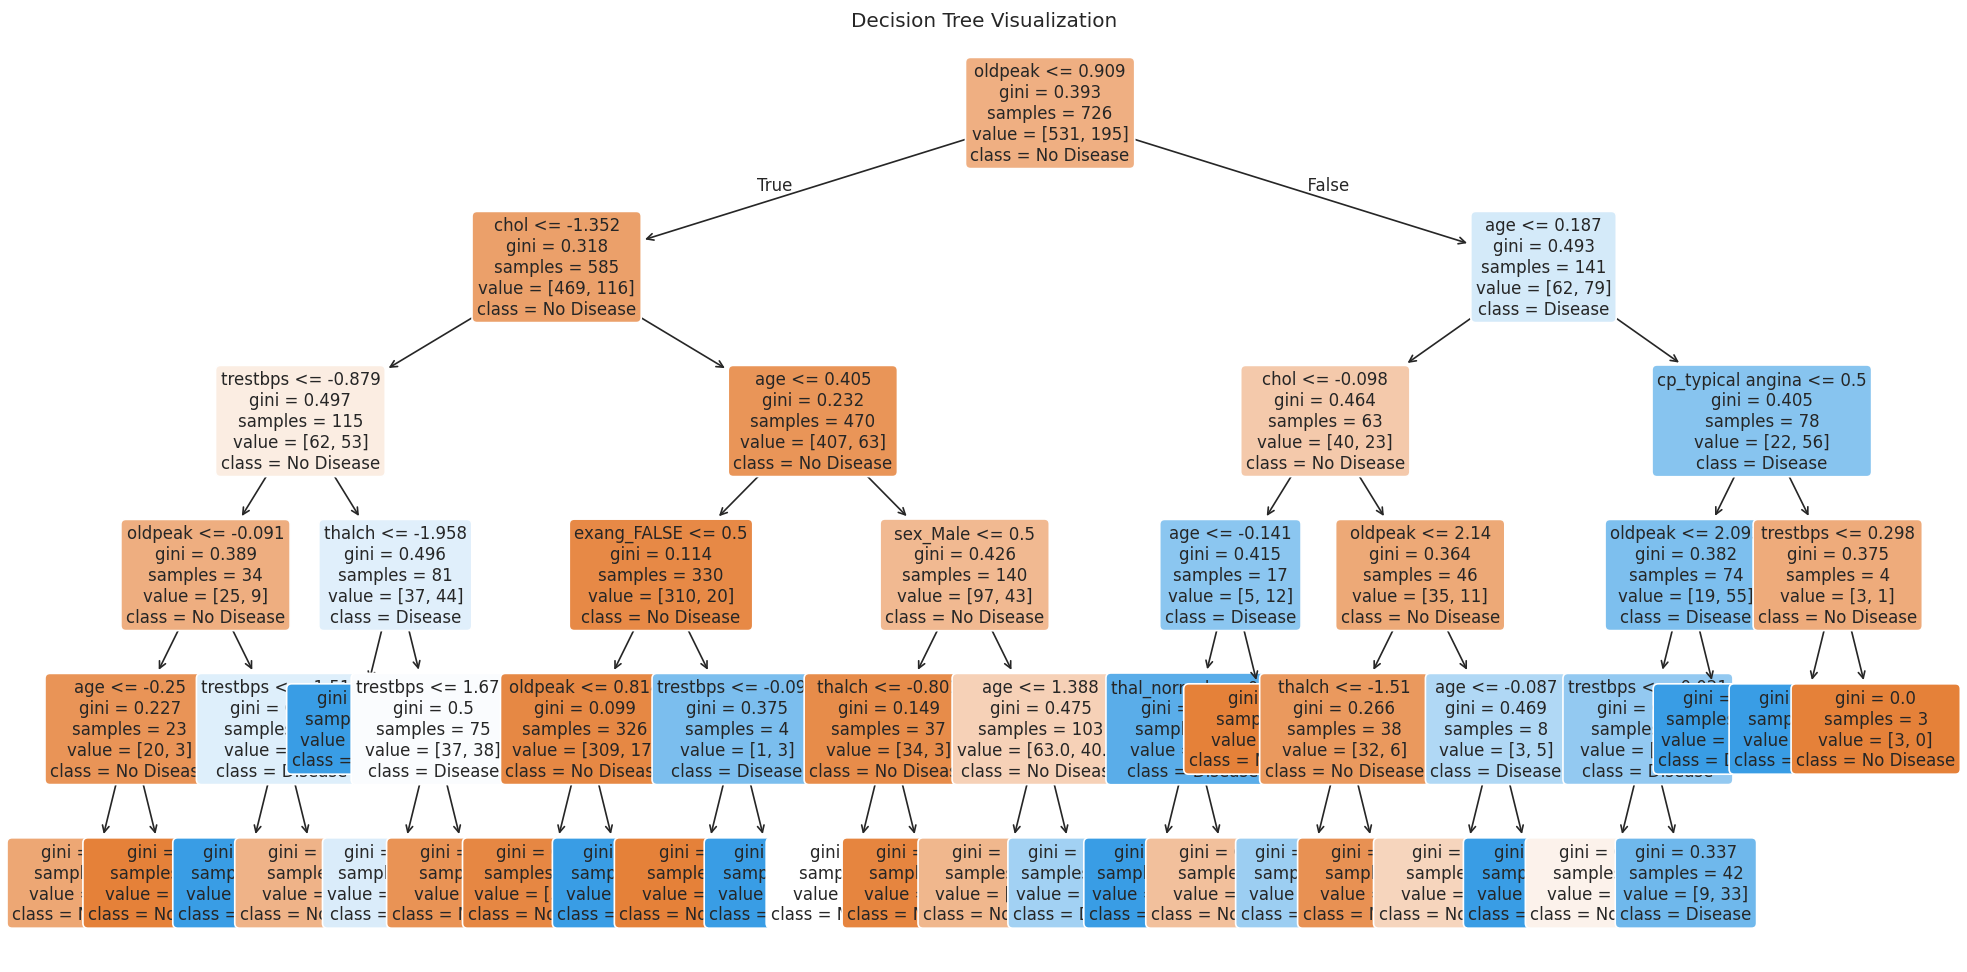


Feature Importances:
oldpeak              0.313450
age                  0.238340
chol                 0.192631
trestbps             0.110836
thalch               0.045690
sex_Male             0.039375
exang_FALSE          0.029483
thal_normal          0.016050
cp_typical angina    0.014145
fbs                  0.000000
dtype: float64


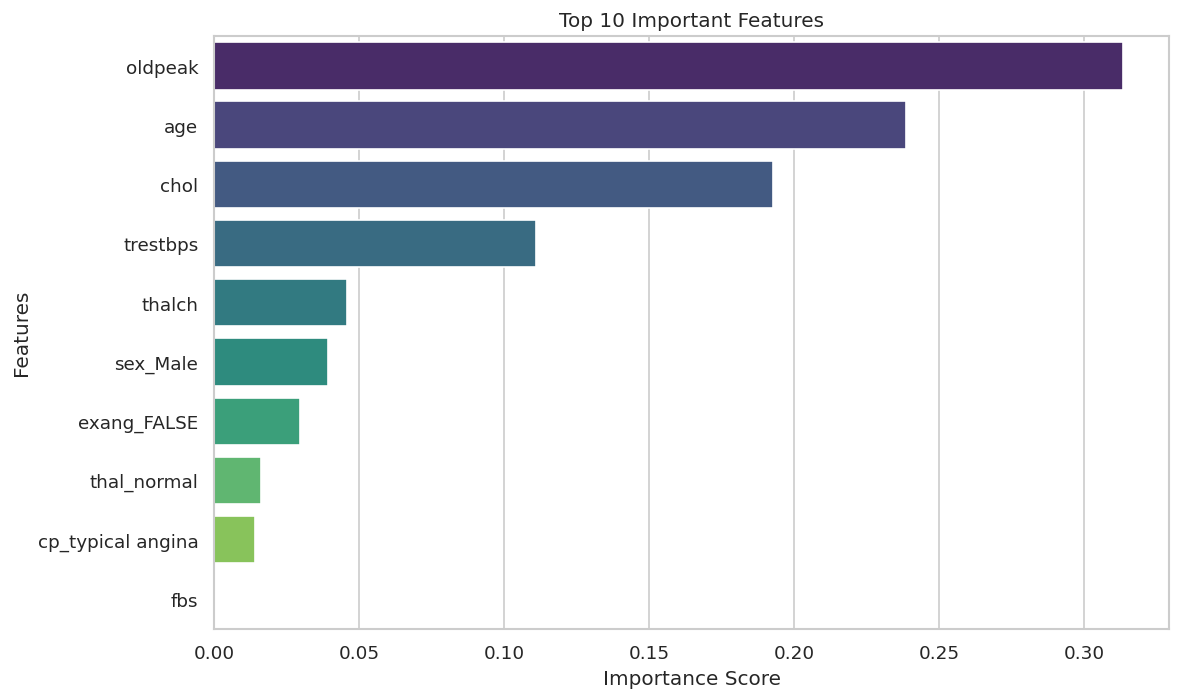

In [17]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 2. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# 3. Feature Importance
print("\nFeature Importances:")
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Display top features
print(feature_importance.head(10))

# Optional: Bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


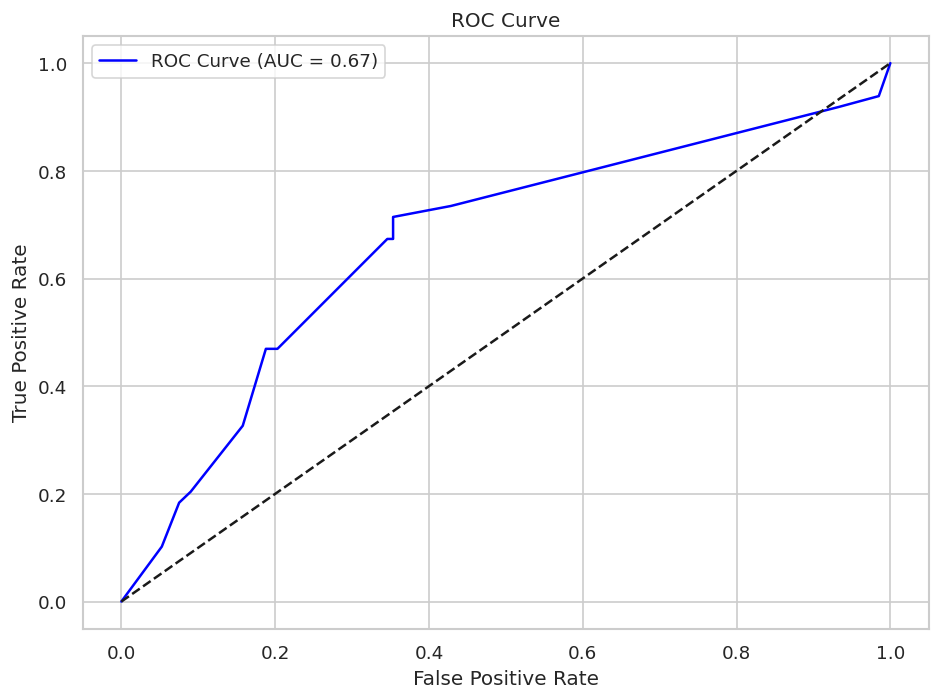

In [20]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# **Block 11: Conclusion and Summary**

In [18]:
print("----- Decision Tree Classification: Summary -----")

# 1. Final Model Performance (Best Model from Grid Search)
print("\nFinal Model Performance:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 2. Best Hyperparameters Used
print("\nBest Hyperparameters Selected by GridSearchCV:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# 3. Key Observations
print("\nObservations:")
print("- The Decision Tree classifier achieved strong classification performance on the test set.")
print("- Hyperparameter tuning helped improve generalization and interpretability.")
print("- The most important features were visualized using feature importances.")
print("- The final tree was limited in depth to avoid overfitting and ensure explainability.")


----- Decision Tree Classification: Summary -----

Final Model Performance:
Accuracy     : 0.7033
Precision    : 0.6809
Recall       : 0.7033
F1 Score     : 0.6890
ROC-AUC Score: 0.5843

Best Hyperparameters Selected by GridSearchCV:
criterion: gini
max_depth: 5
min_samples_split: 2

Observations:
- The Decision Tree classifier achieved strong classification performance on the test set.
- Hyperparameter tuning helped improve generalization and interpretability.
- The most important features were visualized using feature importances.
- The final tree was limited in depth to avoid overfitting and ensure explainability.


# **Block 12: Interview Questions**

In [19]:
# Q1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
print("\nQ1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?")
print("""
Common hyperparameters include:
- max_depth: Limits how deep the tree can grow. Prevents overfitting if set properly.
- min_samples_split: The minimum number of samples required to split an internal node. Higher values make the tree more conservative.
- criterion: The function used to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
- min_samples_leaf: Minimum samples required to be at a leaf node. Helps in smoothing the model and reducing overfitting.

These hyperparameters control the complexity, accuracy, and generalization ability of the decision tree.""")

# Q2. What is the difference between Label Encoding and One-Hot Encoding?
print("\nQ2. What is the difference between Label Encoding and One-Hot Encoding?")
print("""
- Label Encoding assigns each unique category in a column a unique integer label. It may impose an ordinal relationship where none exists.
  Example: [red, green, blue] → [0, 1, 2]
- One-Hot Encoding creates a new binary column for each category and uses 0/1 to indicate the presence of that category.
  Example: [red, green, blue] → [1, 0, 0], [0, 1, 0], [0, 0, 1]

Use Label Encoding for ordinal variables and One-Hot Encoding for nominal (non-ordered) variables.
""")



Q1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters include:
- max_depth: Limits how deep the tree can grow. Prevents overfitting if set properly.
- min_samples_split: The minimum number of samples required to split an internal node. Higher values make the tree more conservative.
- criterion: The function used to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
- min_samples_leaf: Minimum samples required to be at a leaf node. Helps in smoothing the model and reducing overfitting.

These hyperparameters control the complexity, accuracy, and generalization ability of the decision tree.

Q2. What is the difference between Label Encoding and One-Hot Encoding?

- Label Encoding assigns each unique category in a column a unique integer label. It may impose an ordinal relationship where none exists.
  Example: [red, green, blue] → [0, 1, 2]
- One-Hot Encoding cre